In [116]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
import pylab as py 
from collections import defaultdict
import math
import statistics
import operator
import seaborn as sns

In [71]:
# Read in cleaned data
data = pd.read_pickle("./cleaned_data.pkl")

In [112]:
# Overview of property type frequency
counts = data.type.value_counts()
counts

apartment     30715
house         11208
maisonette     8161
penthouse      7102
villa          1630
flat           1585
field            10
Name: type, dtype: int64

In [131]:
property_types = ["Apartment", "House", "Maisonette", "Penthouse", "Villa", "Field"]
for_sale = [(counts[0]+counts[5]), counts[1], counts[2], counts[3], counts[4], counts[6]]

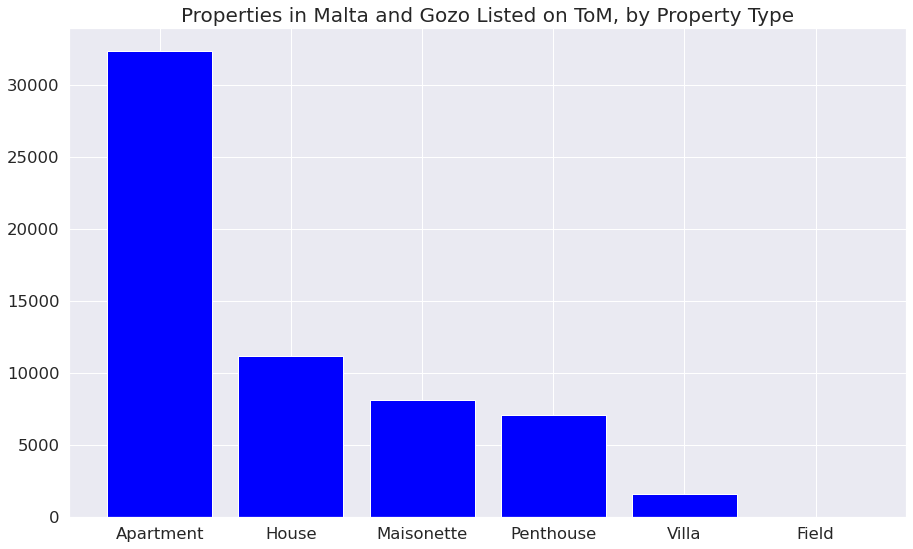

In [134]:
fig, ax = plt.subplots(figsize=(15,9))
ax.set_title('Properties in Malta and Gozo Listed on ToM, by Property Type', fontsize = 20)
ax.tick_params(axis='x', rotation=0)
sns.set(font_scale = 1.5)
rects = plt.bar(property_types, for_sale, color="blue")

plt.savefig("./propertytypes.png")
plt.show()

In [73]:
# Extract dataframes based on property type. Flats and apartments are merged.
flats_apartments = data[(data["type"]=="flat")|(data["type"]=="apartment")]
houses = data[(data["type"]=="house")] 
penthouses = data[(data["type"]=="penthouse")]
maisonettes = data[(data["type"]=="maisonette")]  
villas = data[(data["type"]=="villa")]             
fields = data[(data["type"]=="field")]

### Suppose a property investor wants to acquire the most expensive **villa**, or group of villas. Where should they look?

The data shows that they should search for villas **Għarghur**, **Baħar iċ-Ċagħaq**, **Mellieħa**, **Ibraġ** and **Birgu**. These are the top 5 most expensive locations for villas.

In [89]:
# Villas
means_by_location = {}
pricesbylocation = defaultdict(list)

for i in range(len(villas)):
    pricesbylocation[villas.location.iloc[i]].append(villas.price.iloc[i])

for key, value in pricesbylocation.items():
    means_by_location.update({key: math.floor(statistics.mean(value))})

means_by_location= sorted(means_by_location.items(), key=operator.itemgetter(1),
                          reverse=True)
means_by_location

[('għarghur', 6300000),
 ('baħar iċ-ċagħaq', 1176641),
 ('mellieħa', 977117),
 ('ibraġ', 908760),
 ('birgu', 828985),
 ('qawra', 794500),
 ('xemxija', 765333),
 ('attard', 750387),
 ('lija', 743634),
 ('naxxar', 741651),
 ("st paul's bay", 729615),
 ('st julians', 707167),
 ('mosta', 677835),
 ('st venera', 653571),
 ('qormi', 578750),
 ('baħrija', 508600),
 ('birkirkara', 493105),
 ('gozo', 478714),
 ('pietà', 460000),
 ('żabbar', 416900),
 ('birżebbuġa', 375333),
 ('gżira', 280000)]

### Suppose a property investor wants to acquire the most expensive **apartment**. Where should they look?
The data shows that they should search for apartments in **Qawra**, **Birgu**, **Valletta**, **Sliema** and **Isla**. These are the top 5 most expensive locations for apartments.

### Conversely, suppose a first-time buyer wishes to purchase the cheapest apartment available on the market.
The data shows that **Żabbar**, **Gozo**, **Qormi**, **St Venera** and **Bormla** are the top 5 cheapest locations for apartments on average.

In [90]:
# Apartments
means_by_location = {}
pricesbylocation = defaultdict(list)

for i in range(len(flats_apartments)):
    pricesbylocation[flats_apartments.location.iloc[i]].append(flats_apartments.price.iloc[i])

for key, value in pricesbylocation.items():
    means_by_location.update({key: math.floor(statistics.mean(value))})

means_by_location= sorted(means_by_location.items(), key=operator.itemgetter(1),
                          reverse=True)
means_by_location

[('qawra', 118517641),
 ('birgu', 459554),
 ('valletta', 446239),
 ('sliema', 399604),
 ('isla', 326926),
 ('ibraġ', 321955),
 ('st julians', 310802),
 ('mellieħa', 309284),
 ('baħar iċ-ċagħaq', 284588),
 ('baħrija', 248245),
 ('attard', 247593),
 ('lija', 238611),
 ('xemxija', 228033),
 ("st paul's bay", 227505),
 ('naxxar', 218384),
 ('mosta', 218318),
 ('gżira', 217945),
 ('swatar', 193349),
 ('buġibba', 189593),
 ('żebbug', 189000),
 ('pietà', 185187),
 ('msida', 182472),
 ('birżebbuġa', 167737),
 ('birkirkara', 167096),
 ('hamrun', 162571),
 ('bormla', 160372),
 ('st venera', 159755),
 ('qormi', 153416),
 ('gozo', 150465),
 ('żabbar', 141404)]

### A first-time buyer wishes to purchase the cheapest maisonette available on the market. Where should they look?
The data shows that the cheapest maisonettes are located in **Bormla** with an average price of €161,530. Following are **Isla** (€165,848) and **St Venera** (€173,001).


In [99]:
# Maisonettes
means_by_location = {}
pricesbylocation = defaultdict(list)

for i in range(len(maisonettes)):
    pricesbylocation[maisonettes.location.iloc[i]].append(maisonettes.price.iloc[i])

for key, value in pricesbylocation.items():
    means_by_location.update({key: math.floor(statistics.mean(value))})
    
means_by_location= sorted(means_by_location.items(), key=operator.itemgetter(1))
means_by_location

[('bormla', 161530),
 ('isla', 165848),
 ('st venera', 173001),
 ('żabbar', 176068),
 ('buġibba', 176938),
 ('gozo', 184898),
 ('pietà', 185397),
 ('qawra', 190030),
 ('qormi', 193278),
 ('hamrun', 196333),
 ('birżebbuġa', 199375),
 ('msida', 208091),
 ("st paul's bay", 216113),
 ('birkirkara', 219518),
 ('gżira', 221719),
 ('lija', 222946),
 ('birgu', 223128),
 ('żebbug', 230000),
 ('swatar', 230098),
 ('baħrija', 237842),
 ('mosta', 244112),
 ('mellieħa', 245610),
 ('naxxar', 249684),
 ('attard', 258314),
 ('valletta', 273877),
 ('xemxija', 285236),
 ('baħar iċ-ċagħaq', 292926),
 ('sliema', 295884),
 ('ibraġ', 315910),
 ('st julians', 325083)]

In [93]:
# Houses
means_by_location = {}
pricesbylocation = defaultdict(list)

for i in range(len(houses)):
    pricesbylocation[houses.location.iloc[i]].append(houses.price.iloc[i])

for key, value in pricesbylocation.items():
    means_by_location.update({key: math.floor(statistics.mean(value))})
    
means_by_location= sorted(means_by_location.items(), key=operator.itemgetter(1),
                          reverse=True)
# means_by_location

In [92]:
# Penthouses
means_by_location = {}
pricesbylocation = defaultdict(list)

for i in range(len(penthouses)):
    pricesbylocation[penthouses.location.iloc[i]].append(penthouses.price.iloc[i])

for key, value in pricesbylocation.items():
    means_by_location.update({key: math.floor(statistics.mean(value))})

means_by_location= sorted(means_by_location.items(), key=operator.itemgetter(1),
                          reverse=True)
# means_by_location

In [96]:
# Fields
means_by_location = {}
pricesbylocation = defaultdict(list)

for i in range(len(fields)):
    pricesbylocation[fields.location.iloc[i]].append(fields.price.iloc[i])

for key, value in pricesbylocation.items():
    means_by_location.update({key: math.floor(statistics.mean(value))})

means_by_location= sorted(means_by_location.items(), key=operator.itemgetter(1),
                          reverse=True)
# means_by_location

In [34]:
# STATISTICAL ANALYSIS: Does price follow a gaussian distribution i.e. are prices normally
# distributed?
w, pvalue = stats.shapiro(data.price)
print('Test Statistic: ' + str(w))
print('p-value: ' + str(pvalue))


Test Statistic: 0.00033915042877197266
p-value: 0.0
